## Utilizing Expert Knowledge

- Introduction to Machine Learning with Python
- page 242

In [1]:
!pip3 install mglearn

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import mglearn

In [3]:
citibike = mglearn.datasets.load_citibike()

`citibike` is `pandas.Series` datatype

In [4]:
type(citibike)

pandas.core.series.Series

In [5]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

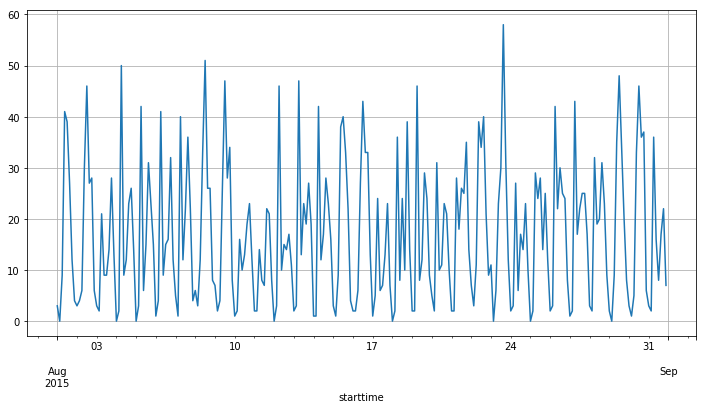

In [6]:
citibike.plot(figsize=(12,6), grid=True)

You can see how to put data/time/year in the plot index!

- check the doc. about `plt.xtics()`

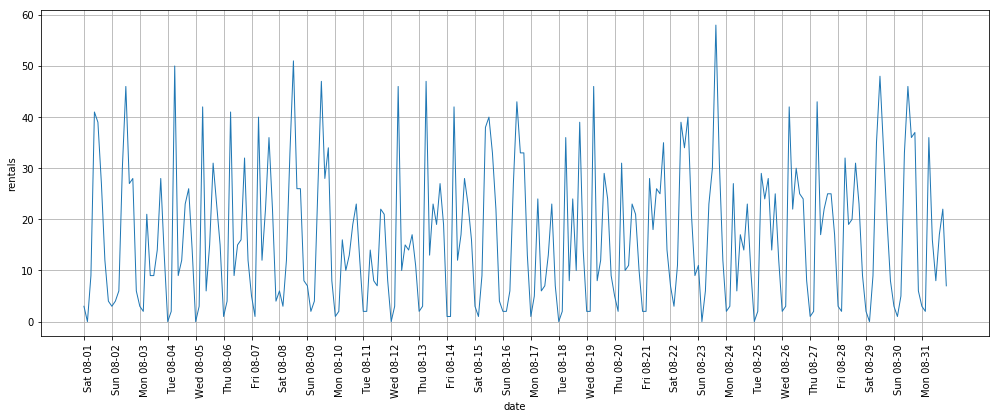

In [7]:
plt.figure (figsize=(17,6))
xtic = pd.date_range (start=citibike.index.min(), end=citibike.index.max(), freq='d')
plt.xticks (xtic, xtic.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot (citibike, linewidth=1)
plt.xlabel ('date')
plt.ylabel ('rentals')
plt.grid (True)

See what `xtic` looks like.

In [19]:
xtic

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')

And this too, which was used as the index in the graph.

In [9]:
xtic.strftime('%a %m-%d')

Index(['Sat 08-01', 'Sun 08-02', 'Mon 08-03', 'Tue 08-04', 'Wed 08-05',
       'Thu 08-06', 'Fri 08-07', 'Sat 08-08', 'Sun 08-09', 'Mon 08-10',
       'Tue 08-11', 'Wed 08-12', 'Thu 08-13', 'Fri 08-14', 'Sat 08-15',
       'Sun 08-16', 'Mon 08-17', 'Tue 08-18', 'Wed 08-19', 'Thu 08-20',
       'Fri 08-21', 'Sat 08-22', 'Sun 08-23', 'Mon 08-24', 'Tue 08-25',
       'Wed 08-26', 'Thu 08-27', 'Fri 08-28', 'Sat 08-29', 'Sun 08-30',
       'Mon 08-31'],
      dtype='object')

The data values can be retrieved from `pd.Series`

In [10]:
y = citibike.values
print (citibike.values, type(citibike.values), citibike.shape)

[ 3  0  9 41 39 27 12  4  3  4  6 30 46 27 28  6  3  2 21  9  9 14 28 13
  0  2 50  9 12 23 26 14  0  3 42  6 15 31 23 15  1  4 41  9 15 16 32 12
  5  1 40 12 22 36 22  4  6  3 12 33 51 26 26  8  7  2  4 26 47 28 34  8
  1  2 16 10 13 19 23 12  2  2 14  8  7 22 21  8  0  3 46 10 15 14 17 11
  2  3 47 13 23 19 27 19  1  1 42 12 17 28 23 16  3  1  9 38 40 33 22  4
  2  2  6 27 43 33 33 13  1  5 24  6  7 13 23  7  0  2 36  8 24 10 39 14
  2  2 46  8 12 29 24  9  5  2 31 10 11 23 21 10  2  2 28 18 26 25 35 14
  7  3 11 39 34 40 21  9 11  0  6 23 30 58 31 12  2  3 27  6 17 14 23 10
  0  2 29 24 28 14 25 12  2  3 42 22 30 25 24  8  1  2 43 17 22 25 25 17
  3  2 32 19 20 31 23  9  2  0  9 35 48 34 20  8  3  1  5 33 46 36 37  6
  3  2 36 16  8 17 22  7] <class 'numpy.ndarray'> (248,)


Convert the index into int numbers. Here, POSIX time is calculated from the time string.

In [11]:
X = citibike.index.strftime('%s')
print (X[:10])

Index(['1438354800', '1438365600', '1438376400', '1438387200', '1438398000',
       '1438408800', '1438419600', '1438430400', '1438441200', '1438452000'],
      dtype='object')


In [12]:
X = X.astype (int)
print (X[:10])

Int64Index([1438354800, 1438365600, 1438376400, 1438387200, 1438398000,
            1438408800, 1438419600, 1438430400, 1438441200, 1438452000],
           dtype='int64')


In [13]:
X = citibike.index.strftime('%s').astype('int').values
X.shape, type(X)

((248,), numpy.ndarray)

In [14]:
X = X.reshape(-1,1)
print (X[:10], type(X), X.shape)

[[1438354800]
 [1438365600]
 [1438376400]
 [1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]] <class 'numpy.ndarray'> (248, 1)


In [26]:
n_train = 184
xticks = xtic # defined up there
def eval_on_features(features, target, regressor):
        # split the given features into a training and a test set
        X_train, X_test = features[:n_train], features[n_train:]
        # also split the target array
        y_train, y_test = target[:n_train], target[n_train:] 
        regressor.fit(X_train, y_train)
        print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test))) 
        y_pred = regressor.predict(X_test)
        y_pred_train = regressor.predict(X_train)
        plt.figure(figsize=(10, 3))
        plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
                   ha="left")
        plt.plot(range(n_train), y_train, label="train")
        plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
        plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
        plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
                 label="prediction test")
        plt.legend(loc=(1.01, 0))
        plt.xlabel("Date")
        plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

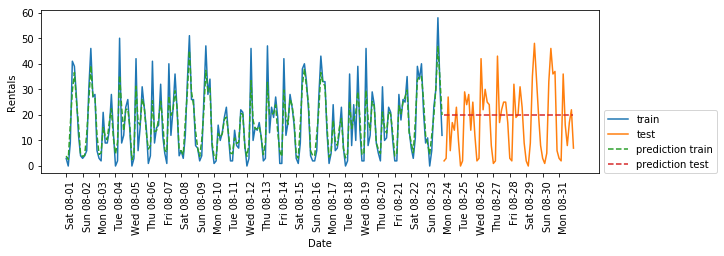

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor (n_estimators=100, random_state=0)
plt.figure()
eval_on_features (X, y, rfreg)

In [65]:
X_hour = citibike.index.hour
print ('shape = ', X_hour.shape, type(X_hour))
X_hour

shape =  (248,) <class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
            ...
            18, 21,  0,  3,  6,  9, 12, 15, 18, 21],
           dtype='int64', name='starttime', length=248)

In [62]:
X_hour = X_hour.values.reshape(-1,1)
print ('shape=', X.shape)
X_hour[:4]

shape= (248, 1)


array([[0],
       [3],
       [6],
       [9]])

In [63]:
np.unique (X_hour)

array([ 0,  3,  6,  9, 12, 15, 18, 21])

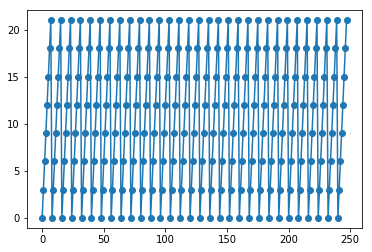

In [58]:
plt.plot (X_hour, 'o-')

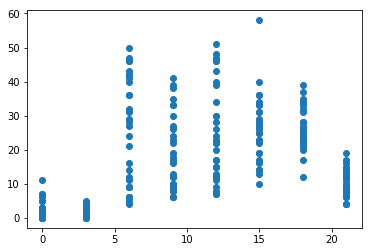

In [59]:
plt.scatter (X_hour, y)

In [49]:
y[:4]

array([ 3,  0,  9, 41])

Test-set R^2: 0.60


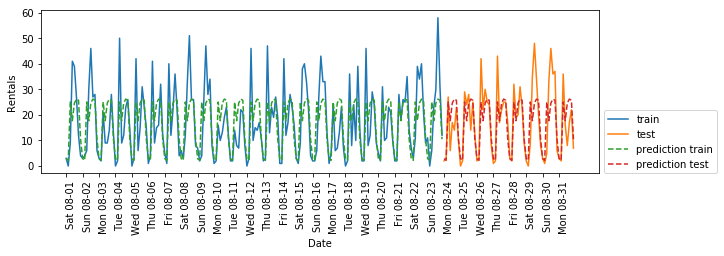

In [50]:
eval_on_features (X_hour, y, rfreg)

In [80]:
week_values = citibike.index.dayofweek.values
hour_values = citibike.index.hour.values

In [84]:
print (citibike.index.hour.values, type(citibike.index.hour.values))

[ 0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21] <class 'numpy.ndarray'>


In [85]:
week_values = week_values.reshape(-1,1)
hour_values = hour_values.reshape(-1,1)
print (week_values[:3], hour_values[:3])
week_values.shape, hour_values.shape

[[5]
 [5]
 [5]] [[0]
 [3]
 [6]]


((248, 1), (248, 1))

In [89]:
X_hour_week = np.hstack([week_values.reshape(-1,1), hour_values.reshape(-1,1)])
print (type(X_hour_week),  X_hour_week.shape)
X_hour_week[1]

<class 'numpy.ndarray'> (248, 2)


array([5, 3])

Text(0, 0.5, 'time of days')

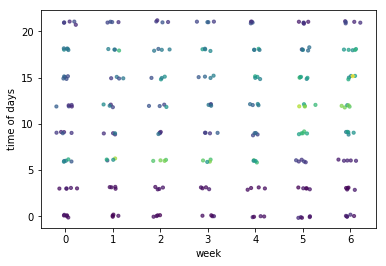

In [107]:
xx = X_hour_week + np.random.randn (*X_hour_week.shape)*0.1
plt.scatter (xx[:,0], xx[:,1], s=10, c=y, marker = 'o', alpha=0.7);
plt.xlabel ('week')
plt.ylabel('time of days')

Test-set R^2: 0.84


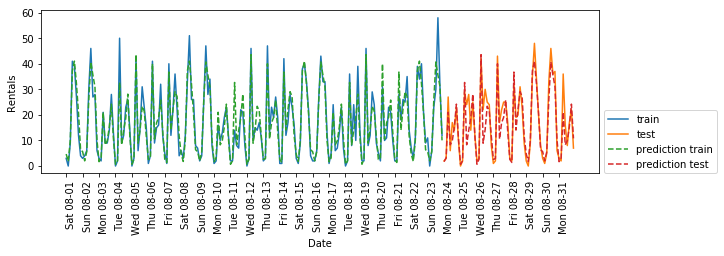

In [108]:
eval_on_features (X_hour_week, y, rfreg)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Test-set R^2: 0.13


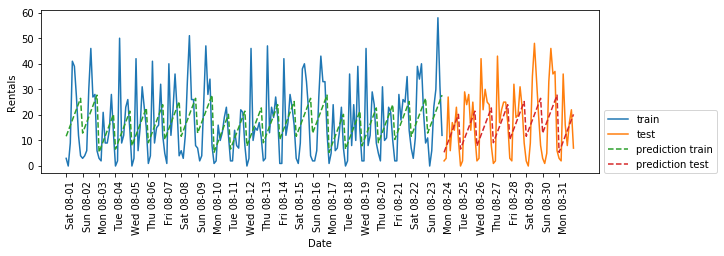

In [109]:
from sklearn.linear_model import LinearRegression
eval_on_features (X_hour_week, y, LinearRegression() )

In [110]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [123]:
onehot = enc.fit_transform (X_hour_week)
print (type(onehot))
onehot = onehot.toarray()
print (onehot, type(onehot), onehot.shape)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]] <class 'numpy.ndarray'> (248, 15)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [125]:
248/8

31.0

In [127]:
from sklearn.preprocessing import PolynomialFeatures
pt = PolynomialFeatures (degree=2, interaction_only=True, include_bias=False)
X_poly = pt.fit_transform (onehot)

In [129]:
X_poly, X_poly.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]), (248, 120))

Why?

15 = 7+8 = one hot encoding -> polynomal = 15 + 14 + ... + 1 = 15*16 / 2 = 120

Test-set R^2: 0.85


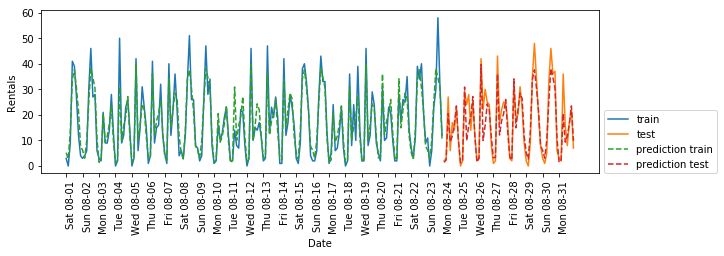

In [144]:
from sklearn.linear_model import Ridge
ridge = Ridge()
eval_on_features (X_poly, y, ridge)

#### Q. Can you use 56 = 7x8 dim feature vector instead of 120 polynomial?

In [145]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
features = day + hour
print ('features=', features)

features= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [146]:
fnames = pt.get_feature_names()
len(fnames)

120

In [156]:
fpoly = pt.get_feature_names (features)
fnz = np.array(fpoly)[ ridge.coef_ != 0]
print (len(fnz), fnz[:10])

71 ['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' '00:00' '03:00' '06:00']


In [167]:
cnz = ridge.coef_[ ridge.coef_ != 0]
print ('@@ {} non-zero features out of {} features'.format(len(cnz), len(ridge.coef_)))

@@ 71 non-zero features out of 120 features


Text(0, 0.5, 'feature')

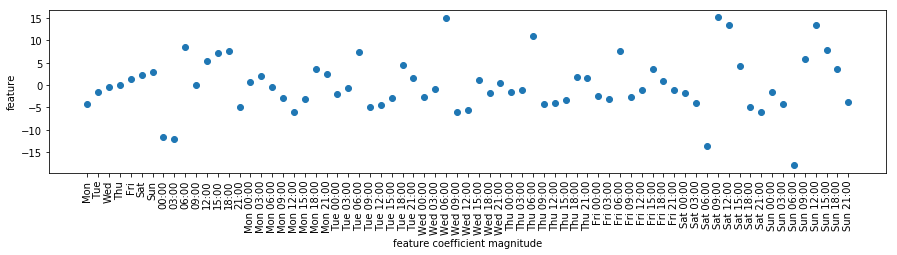

In [172]:
plt.figure (figsize=(15,3))
plt.plot (cnz, 'o')
plt.xticks (np.arange(len(cnz)), fnz, rotation=90)
plt.xlabel ('feature coefficient magnitude')
plt.ylabel ('feature')